Кумакшев Феликс Владимирович; ТФэ-01-21

## Определить собственные частоты колебаний пакета лопаток в динамических условиях и построить вибрационную диаграмму для А0, A1, B0 форм колебаний на одном графике и сделать вывод
### Средний диаметр ступени 1.25 м. Длина рабочей лопатки 0.15 м. Площадь сечения лопатки 19.44 * 10е-4 м^2. Момент инерции 1.43 * 10е-8 м^4, beta_y = 75
### Плотность стали 12Х13 8000 кг/м3. Модуль упругости Е=2 * 10е11 Па. Число рабочих лопаток z=84. Размер бандажной ленты 60 х 5 мм. Число лопаток в пакете m = 8. Шаг по бандажу = 25 мм..

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
m = 8 # Число лопаток в пакете
t = 25 * 1e-3 # Шаг по бандажу
beta = 75 
density = 8000 # Плотность стали
E = 2 * (10**11) # Модуль упругости
z = 84 # Число рабочих лопаток
d = 1.25 # Средний диаметр ступени
l = 0.15 # Длина рабочей лопатки
f = 19.44 * (10 ** (-4)) # Площадь сечения лопатки
J = 1.43 * (10 ** (-8)) # Момент инерции
# Размер бандажной ленты
delta = 5 * 1e-3
B = 60 * 1e-3 

In [30]:
i = (J / f) ** 0.5
_lambda = l / i
_lambda

55.30588810191244

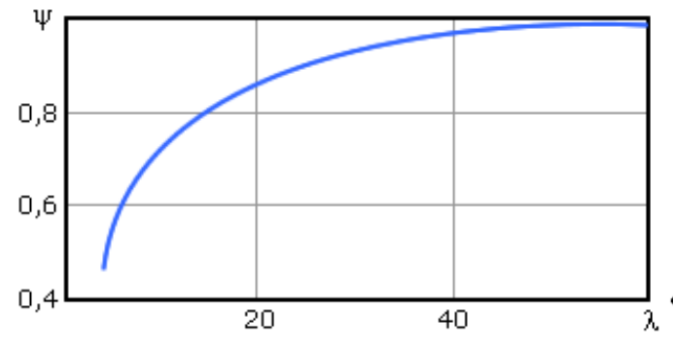

In [31]:
# По графику определяем 
psi = 0.99

In [32]:
def static_frequency(i):
    _m = {
        1: 0.56,
        2: 3.51,
        3: 9.82
 
    }
    first = psi * _m[i] / (l ** 2)
    second = ((E * J) / (density * f)) ** 0.5
    return first * second

In [33]:

static_frequency(1), static_frequency(2), static_frequency(3)

(334.14163725111536, 2094.3520477703837, 5859.412281796345)

### Коэффициент жесткости бандажа

In [34]:
H = 0.12
J_b = B * (delta ** 3) / 12

k = (12 * (m - 1) * H * E * J_b * l * np.sin(np.deg2rad(beta)) ** 2) / (m * t * J * E)
k

0.30828566548536623

In [35]:
nu = B * delta * t / (f * l)
nu

0.025720164609053492

In [36]:
f_a0 = static_frequency(1) * 0.8
f_a1 = static_frequency(1) * 6
f_b0 = static_frequency(1) * 4.2

In [37]:
f_a0, f_a1, f_b0 

(267.3133098008923, 2004.8498235066922, 1403.3948764546847)

### Влияние вращения на собственные частоты колебаний пакета лопаток

In [38]:
B_bandage = 0.5 * ((d/l) - 1) * ((nu+1/2)/(nu+1/3)) + np.sin(np.deg2rad(beta)) ** 2
B_bandage

6.301685099217912

In [54]:
def to_dynamic_frequency(f, n=50):
    root = (1 + B_bandage * (n / f) ** 2) ** 0.5
    return f * root

In [55]:
to_dynamic_frequency(f_a0), to_dynamic_frequency(f_a1), to_dynamic_frequency(f_b0)

(295.3144397836865, 2008.7750067050465, 1408.996590488176)

In [56]:
def min_max(f, delta=0.05):
    return f * (1-delta) , f * (1 + delta)

In [66]:
n_line = np.linspace(0, 80)
min_line, max_line = min_max(to_dynamic_frequency(f_a0, n=n_line))
min_line1, max_line1 = min_max(to_dynamic_frequency(f_a1, n=n_line))
min_line2, max_line2 = min_max(to_dynamic_frequency(f_b0, n=n_line))

In [67]:
def k_line(k, n=n_line):
    return k * n_line

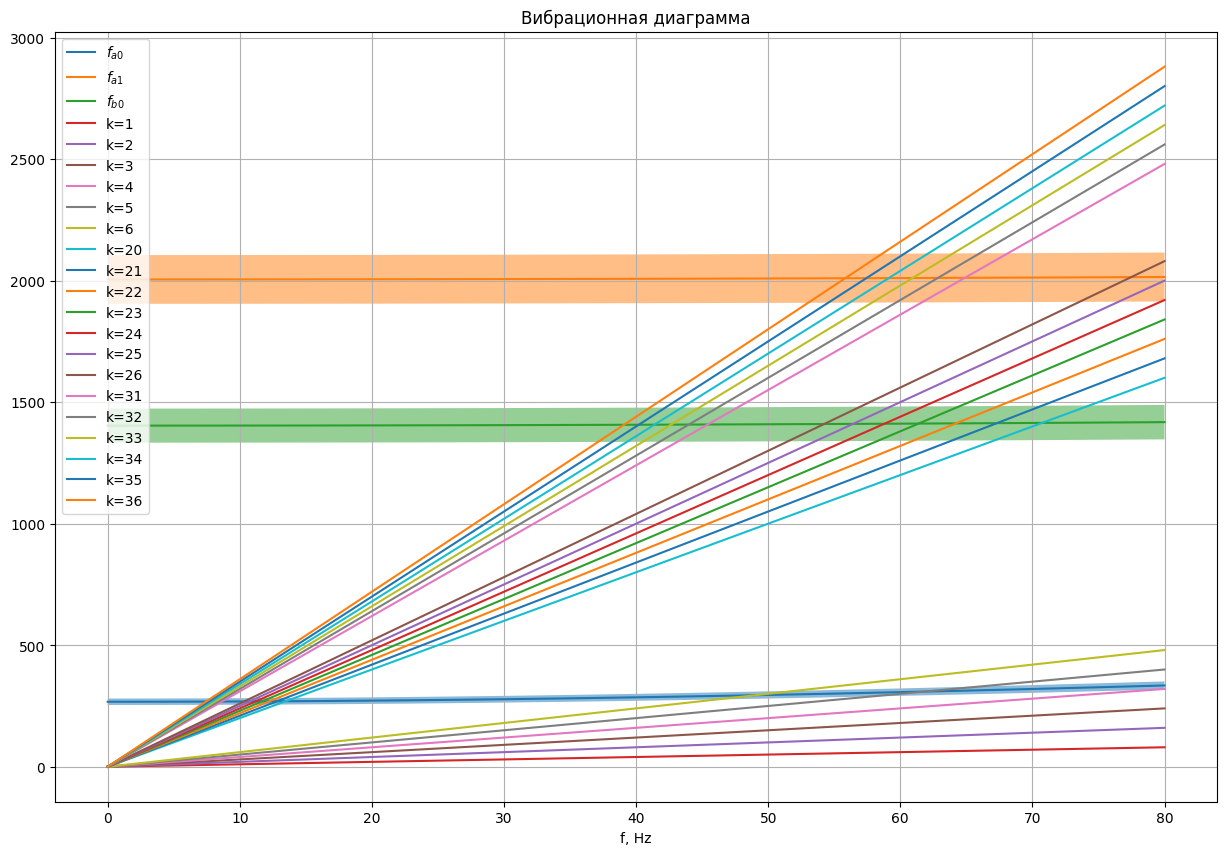

In [68]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(n_line, to_dynamic_frequency(f_a0, n=n_line), label='$f_{a0}$')
ax.plot(n_line, to_dynamic_frequency(f_a1, n=n_line), label='$f_{a1}$')
ax.plot(n_line, to_dynamic_frequency(f_b0, n=n_line), label='$f_{b0}$')
ax.fill_between(n_line, y1=min_line, y2=max_line, alpha=0.5)
ax.fill_between(n_line, y1=min_line1, y2=max_line1, alpha=0.5)
ax.fill_between(n_line, y1=min_line2, y2=max_line2, alpha=0.5)

ax.plot(n_line, k_line(1), label=f'k={1}')
ax.plot(n_line, k_line(2), label=f'k={2}')
ax.plot(n_line, k_line(3), label=f'k={3}')
ax.plot(n_line, k_line(4), label=f'k={4}')
ax.plot(n_line, k_line(5), label=f'k={5}')
ax.plot(n_line, k_line(6), label=f'k={6}')

ax.plot(n_line, k_line(20), label=f'k={20}')
ax.plot(n_line, k_line(21), label=f'k={21}')
ax.plot(n_line, k_line(22), label=f'k={22}')
ax.plot(n_line, k_line(23), label=f'k={23}')
ax.plot(n_line, k_line(24), label=f'k={24}')
ax.plot(n_line, k_line(25), label=f'k={25}')
ax.plot(n_line, k_line(26), label=f'k={26}')

ax.plot(n_line, k_line(31), label=f'k={31}')
ax.plot(n_line, k_line(32), label=f'k={32}')
ax.plot(n_line, k_line(33), label=f'k={33}')
ax.plot(n_line, k_line(34), label=f'k={34}')
ax.plot(n_line, k_line(35), label=f'k={35}')
ax.plot(n_line, k_line(36), label=f'k={36}')

ax.set_xlabel("n, rps")
ax.set_xlabel("f, Hz")
ax.grid()
ax.legend()
ax.set_title("Вибрационная диаграмма");

# Вывод

## Для колебаний формы А0 опасной зоной является (48 - 60)Hz K = 32 - 33,
## Для колебаний формы A1  опасной зоной является (52 - 67) Hz K= 31 - 36,
## Для колебаний формы B0 опасной зоной является (52 - 62) Hz K = 23-26